_본 노트북은 [텐서플로우 코리아 블로그](https://tensorflowkorea.wordpress.com)의 [First Contact with TensorFlow](http://www.jorditorres.org/TensorFlow/) 책의 [번역본](https://tensorflowkorea.wordpress.com/2016/04/28/first-contact-with-tensorflow/)을 코드를 직접 실행이 가능하도록 복사하여 옮긴 것입니다. 원본 및 번역본의 [라이센스 정책](https://creativecommons.org/licenses/by-nc-sa/3.0/)에 따라 공개 및 공유합니다._

4. 텐서플로우 단일 레이어 뉴럴 네트워크
====

머리말에서 딥러닝의 대표적인 예는 패턴인식이라고 했었습니다. 그래서 프로그래밍을 처음 배울 때 ‘Hello World’를 프린트하는 것으로 시작하듯이 딥러닝에서는 손글씨 숫자 이미지를 인식하는 문제를 가지고 시작합니다.

이 장에서는 텐서플로우에서 단일 레이어(single layer) 뉴럴 네트워크를 어떻게 만드는지 단계별로 설명하겠습니다. 이 뉴럴 네트워크는 손글씨 숫자를 인식하는 것으로 텐서플로우의 초보자를 위한 튜토리얼 중 하나를 기반으로 하고 있습니다.(역주: 실제로 이 두 글을 비교해서 읽으면 좋습니다.)

이 책은 입문서로서 씌여진 것이라 예제를 진행하면서 일부 개념과 이론을 단순화하여 설명했습니다.

독자가 이 장을 읽은 후 이 예제의 배경 이론에 대해 더 알고 싶으면 이 예제의 이론적 개념에 대해 깊게 다루고 있고 온라인에서 읽을 수 있는 뉴럴 네트워크와 딥러닝 책을 추천합니다.

MNIST 데이터셋
----

MNIST 데이터셋은 훈련용 6만개와 테스트용 1만개로 이루어진 손글씨 숫자의 흑백이미지 데이터입니다. 이 MNIST 데이터셋은 MNIST 데이터베이스에서 받을 수 있습니다.

이미지를 다루는 경우에 데이터 전처리나 포맷팅은 중요한 부분이지만 시간이 많이 걸립니다. 그런면에서 시간을 절약하면서 실제 예제로 패턴 인식을 시작하려는 대부분의 사람들에게 이 데이터셋은 안성맞춤입니다.

이 흑백 이미지는 가로세로 비율은 그대로 유지하고 20×20 픽셀로 정규화(normalization)되어 있습니다. 정규화 알고리즘(가장 낮은 것에 맞춰 전체 이미지 해상도를 감소시킴)에 사용된 안티알리아싱(anti-aliasing) 처리 때문에 이미지에는 회색 픽셀이 들어 있습니다. 그런 후에 이미지의 중심을 계산하여 28×28 픽셀 크기의 프레임 중앙에 위치시켰습니다. 아래는 몇가지 이미지 예시입니다.

![](https://tensorflowkorea.files.wordpress.com/2016/05/image034.png?w=1250)

이 예제에서 사용할 머신러닝 방법은 감독 학습(supervised learning)입니다. 즉 이미지 데이터에는 어떤 숫자인지를 나타내는 레이블(label) 정보가 들어 있습니다. 이런 형태가 일반적으로 자주 접하게 되는 머신러닝 문제입니다.

이런 경우 먼저 레이블 데이터와 함께 전체 숫자 이미지를 로드합니다. 그리고 훈련 과정 동안 학습 모델은 이미지를 입력받아 각 카테고리(역주: 0~9까지)에 대한 점수를 원소로 갖는 벡터 형태로 결과를 출력합니다. 레이블에 맞는 카테고리가 가장 높은 점수를 가지길 기대하려면 학습 모델이 훈련과정을 거쳐야 합니다.

출력 점수와 기대 점수의 차이를 측정하는 에러함수(이전 장에서 했듯이)를 계산합니다. 그리고 학습모델은 이 에러를 줄이기 위해 가중치(weight) 파라메타를 조정하게 됩니다. 전형적인 딥러닝 시스템에는 수억개의 가중치 파라메타와 수억개의 레이블된 훈련용 데이터가 있습니다. 우리는 이런 종류의 모델이 어떻게 작동하는지 이해하기 쉽게 작은 예제를 다루도록 하겠습니다.

쉽게 데이터를 다운로드하기 위해 input_data.py 스크립트를 사용합니다. 이 파일은 원래 구글 사이트에서 받은 것이지만 편의를 위해 이 책의 깃허브에 업로드해 놓았습니다. input_data.py 를 텐서플로우로 프로그래밍할 디렉토리에 다운 받으세요. 프로그램에서 아래와 같이 import 만 하면 됩니다.(역주: 이 스크립트는 텐서플로우 코드베이스에 통합되어 있습니다. 그러므로 따로 다운받으실 필요가 없고 바로 import 하여 사용할 수 있습니다. 따라서 아래 원문 코드의 import 문을 수정하였습니다. 아래 코드를 실행하면 현재 디렉토리 하위에 MNIST_data 폴더가 만들어지고 자동으로 필요한 데이터가 다운로드 됩니다. 네트워크가 빠르지 않을 수 있으니 에러가 발생하면 몇차례 재 시도하면 됩니다.)

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


위 두 문장을 실행하면 훈련 데이터가 들어있는 mnist.train 과 테스트 데이터가 들어 있는 mnist.test 를 얻게됩니다. 앞서 언급한 대로 데이터의 각 엘리먼트는 이미지(“xs” 로 부르겠습니다)와 레이블(“ys” 로 부르겠습니다)로 구성되어 있습니다. 훈련 데이터나 테스트 데이터 모두 “xs” 와 “ys” 를 가지고 있습니다. 또한 훈련 이미지는 mnist.train.image 로 참조가 가능하고 레이블은 mnist.train.labels 로 참조가 가능합니다.

이전에 설명했듯이 이 이미지는 28×28 픽셀로 구성되어 있으며 수치 행렬로 나타낼 수도 있습니다. 예를 들면 숫자 ‘1’ 이미지는 아래와 같습니다.

![](https://tensorflowkorea.files.wordpress.com/2016/05/image036-1024x3972x.png?w=1250)

0 과 1 사이의 값으로 각 픽셀의 검은 정도가 표시됩니다. 이 행렬은 28×28 = 784 개의 숫자 배열로 표현될 수 있습니다. 실제로 이미지가 784 차원의 벡터 공간에 있는 일련의 포인트들로 변환된 것입니다. 이미지를 2차원 구조로 표현하면 일부 정보를 잃어버릴 수 있어 어떤 컴퓨터 비전 알고리즘에는 결과에 영향을 미칠 수 있습니다. 하지만 이 책에서 사용하는 간단한 알고리즘에는 문제가 되지 않습니다.

정리하면 2D 텐서인 mnist.train.images 를 얻었으므로 get_shape() 메소드로 구조를 확인합니다.

In [2]:
mnist.train.images.shape

(55000, 784)

첫번째 차원은 각 이미지에 대한 인덱스이며 두번째 차원은 이미지 안의 픽셀을 나타냅니다. 텐서의 모든 엘리먼트는 픽셀의 밝기를 나타내는 0 에서 1 사이의 값입니다.(역주: 흰색이 0, 검은색이 1 입니다)

또한 각 이미지가 어떤 글자인지 알 수 있도록 0에서 9까지의 숫자로 구성된 레이블 데이터가 있습니다. 이 예제에서는 레이블을 10개의 엘리먼트로 구성된 벡터로 표현합니다. 이 벡터는 레이블 숫자에 대응되는 위치에 1 의 값을 가지고 그 외에는 0 값을 가집니다.(역주: ‘2’ 이미지의 벡터는 [0, 1, 0, … 0] 입니다) 그래서 mnist.train.labels 는 TensorShape([Dimension(60000), Dimension(10)]) 구조를 갖는 텐서입니다.

인공 뉴런
----

이 책이 뉴럴 네트워크의 이론적 개념에 포커싱을 맞추고 있진 않지만 독자들의 이해를 돕기 위해 어떻게 뉴런들이 훈련 데이터를 통해 학습하는지 짧고 쉽게 소개하겠습니다. 이론에 대해 이미 알고 있는 독자는 이 섹션을 건너뛰고 텐서플로우 프로그래밍 부분으로 바로 가도 좋습니다.

뉴런이 어떻게 학습하는지 간단한 그림 예제를 보겠습니다. 사각형과 원 모양으로 표시된 포인트들이 2차원 평면에 있습니다. 이럴 때 새로운 포인트 “X” 가 주어지면 이 포인트는 어떤 레이블이 될까요?

![](https://tensorflowkorea.files.wordpress.com/2016/05/screen-shot-2016-02-16-at-09-30-14.png?w=625)

일반적인 근사 방법은 두 그룹을 나누는 라인을 긋고 이를 분류의 기준으로 삼는 것입니다.

![](https://tensorflowkorea.files.wordpress.com/2016/05/screen-shot-2016-02-16-at-09-30-09.png?w=625)

이 예에서 입력 데이터는 2차원 공간의 좌표 (x, y)를 갖는 벡터로 표현됩니다. 그리고 ‘0’ 또는 ‘1’(직선의 위, 아래)을 리턴하는 함수로 사각형과 원으로 분류하게 됩니다. 수학적으로는 선형 회귀분석 장에서 배운대로 이 ‘라인'(분류기준)은 y = W * x + b 로 쓸 수 있습니다.

일반화해서 말하자면 뉴런은 가중치 W (입력 데이터 X 와 같은 차원을 가짐)와 오프셋 b (뉴럴 네트워크에서 바이어스-bias-라고 불림)를 학습시켜 어떻게 포인트들을 분류하는지를 배우는 것입니다. 이런 방식을 따라 뉴런은 가중치 W 를 사용하여 입력 데이터 X 의 가중치 합을 계산하고 오프셋 b 를 더합니다. 마지막으로 뉴런은 ‘0’ 또는 ‘1’의 결과로 만들기 위해 비선형 ‘활성화’ 함수를 적용합니다. 뉴런의 기능을 조금 형식적으로 쓰면 아래와 같습니다.

![](https://tensorflowkorea.files.wordpress.com/2016/05/image043.png?w=625)

뉴런의 함수를 정의한 것을 이용해 어떻게 뉴런이 사각형과 원으로 레이블되어 있는 훈련 데이터로 파라메타 W 와 b 를 학습하고 새로운 포인트 ‘X’ 를 분류하는지 알아보도록 하겠습니다.

시작은 선형회귀때 했던 것과 비슷합니다. 즉, 뉴런에게 레이블된 데이터를 주입하고 얻은 결과를 실제 값과 비교하는 것입니다. 그렇게 반복하면서 2장에서 선형 회귀분석에서 본 것 처럼 에러를 최소화하기 위해 가중치 W 와 b 를 조정합니다.

일단 W 와 b 파라메타를 구해서 가중치 합(역주: W*x + b 값)을 계산하고 나면 z 에 저장된 결과를 ‘0’ 또는 ‘1’ 로 바꿀 함수가 필요합니다. 몇 종류의 활성화 함수가 있지만 여기에서는 0 과 1 사이의 실수를 리턴하는 유명한 시그모이드(sigmoid) 함수를 사용하겠습니다.

![](https://tensorflowkorea.files.wordpress.com/2016/05/image046.png?w=625)

이 공식을 보면 0 과 1 에 가까운 값으로 수렴하는 경향이 있는 것을 알 수 있습니다. 만약 z 가 충분히 큰 양수이면 e^{-z} 는 0 에 가까워지고 결국 y 는 1 이 됩니다. 만약 z 가 충분히 큰 음수면 e^{-z} 는 매우 큰 양수가 되고 분모가 커지므로 y 는 0 이 됩니다. 이 함수를 그림으로 나타내면 아래와 같습니다.

![](https://tensorflowkorea.files.wordpress.com/2016/05/image045.png?w=625)

여기서 우리는 하나의 뉴런에 대해서 정의를 했지만 뉴럴 네트워크는 사실상 여러가지 방식으로 연결되어 있고 각기 다른 활성화 함수들을 사용하는 뉴런들을 합쳐 놓은 것입니다. 이 책의 구성상 뉴럴 네트워크 세계의 모든 면면을 살펴 볼 수는 없을 것 같습니다만 진짜 흥미로운 분야입니다.

뉴럴 네트워크의 전형적인 구조는(5장에서 사용하게 됨) 입력을 받는 하위 레이어(입력 레이어), 결과 값을 내는 상위 레이어(출력 레이어)처럼 여러개의 레이어로 뉴런을 구성하는 것입니다. 뉴럴 네트워크는 히든(hidden) 레이어라 불리는 여러개의 중간 레이어를 가질 수 있습니다. 그림으로 보면 아래와 같습니다.

![](https://tensorflowkorea.files.wordpress.com/2016/05/image049.gif?w=625)

이런 네트워크에서는 한 레이어의 뉴런들은 정보를 받기 위해 이전 레이어의 뉴런과 커뮤니케이션 하고 결과를 내보내기 위해 다음 레이어의 뉴런과 커뮤니케이션 합니다.

앞서 이야기한 것 처럼 시그모이드 외에도 각기 다른 특성을 가진 여러가지 활성화 함수가 있습니다. 예를 들면 출력 레이어에서 두가지 이상의 클래스로 데이터를 분류하고 싶을 때에는 시그모이드 함수의 일반화된 형태인 소프트맥스 활성화 함수를 사용할 수 있습니다. 소프트맥스 함수는 각 클래스(역주: 카테고리)에 대한 확률을 만들어 냅니다. 각 클래스의 확률의 합은 1 이고 가장 높은 값을 가진 클래스가 결과 값이 될 가능성이 가장 높습니다.

간단한 예제: 소프트맥스
----

여기서 풀려는 문제는 입력 이미지가 주어졌을 때 0~9 까지 각 숫자와 얼마나 비슷한지에 대한 확률을 얻으려는 것임을 기억해 두세요. 예를 들면 우리 모델이 어떤 이미지에 대해 “9” 일 확률이 80% 이고 “8” 일 확률이 5%(9의 애매한 꼬리 부분으로 인해) 이며 다른 숫자에 대해서는 낮은 확률을 예측할 수 있습니다. 손글씨 숫자를 인식하는 것엔 어느정도 불확실한 부분이 있고 100% 확신을 가지고 하긴 어렵습니다. 이런 경우에 확률 분포는 예측에 대해 얼마나 신뢰할 수 있는지에 대해 좋은 정보를 제공합니다.

그래서 우리는 상호 배타적인 레이블에 대한 결과로 확률 분포를 담은 출력 벡터를 가집니다. 10개의 확률 값을 가진 이 벡터는 각각 0 에서 9 까지의 숫자에 대응되는 것이고 확률의 전체 합은 1 입니다.

앞서 언급한 것 처럼 이 벡터는 출력 레이어를 소프트맥스 활성화 함수로 구성하여 얻어집니다. 소프트맥스 함수를 사용한 뉴런의 출력 값은 그 레이어의 다른 뉴런의 출력 값에 영향을 받게 되고 그들의 출력 값 합은 1 이 되어야 합니다.

소프트맥스 함수는 두개의 주요 단계가 있습니다. 첫번째는 이미지가 어떤 레이블에 속하는 지 근거(evidence)들을 계산하는 것이며 두번째는 근거들을 각 레이블에 대한 확률로 변환하는 것입니다.

 클래스 소속 근거(evidence of belonging)
 ----
 
 이미지가 어떤 클래스 혹은 레이블에 속하는 지의 근거를 측정하려면 보통 사용하는 방법은 픽셀의 진한 정도에 대한 가중치 합을 계산하는 것입니다. 어떤 클래스 픽셀에는 없는 진한 픽셀이 이미지에 있다면 가중치는 음의 값이 되고 클래스의 진한 픽셀이 이미지와 자주 겹친다면 가중치는 양의 값이 됩니다.

그림으로 숫자 ‘0’ 을 학습한 모델의 예를 살펴 보겠습니다.(나중에 어떻게 학습되는지 살펴보겠습니다) 여기에서는 이미지가 어떤 클래스에 속할 지에 대한 정보를 가진 어떤 것이 모델이라고 정의합니다. 이 경우에는 아래와 같은 모델이 선택되었습니다. 붉은 색은 잘 맞지 않는 부분을 나타내고(즉 ‘0’ 에는 잘 나타나지 않는 픽셀임) 푸른 색은 잘 들어 맞는 부분임을 나타냅니다.

![](https://tensorflowkorea.files.wordpress.com/2016/05/image050.png?w=625)

28×28 픽셀을 가진 흰 종이에 “0” 을 그려 본다고 생각해 봅시다. 일반적으로 ‘0’ 은 푸른 색 부분에 그려지게 될 것입니다.(20×20 그림 영역 주위에 약간의 여유를 두고 가운데를 맞춘 것임을 기억하세요)

붉은 영역을 가로지르는 이미지는 숫자 0 이 아니라고 생각하는 것이 자연스럽습니다. 그래서 푸른 영역에 위치한 픽셀들은 가산점을 주고 붉은 영역에 위치한 픽셀들은 페널티를 주는 측정 방법이 타당성이 있습니다.

이제 숫자 ‘3’ 을 생각해 봅시다. 숫자 ‘0’ 을 위한 모델에서는 붉은 영역이 ‘0’ 이 될 가능성을 낮추는 역할을 합니다. 하지만 아래와 같은 모델에서는 ‘3’ 을 구성하는 픽셀은 푸른 영역이 되고 ‘0’ 을 그리면 붉은 색위에 놓일 것 입니다.

![](https://tensorflowkorea.files.wordpress.com/2016/05/image052.png?w=625)

이 두 예제를 보면서 설명한 방법으로 어떻게 이미지의 숫자를 추정할 수 있는지 이해하는데 도움이 되었길 바랍니다.

아래 그림은 MNIST 데이터셋에서 학습된 10개의 레이블(클래스)입니다.(텐서플로우 예제에서 추출함) 붉은 색은 음의 가중치를 나타내고 푸른색은 양의 가중치를 나타냅니다.

![](https://tensorflowkorea.files.wordpress.com/2016/05/image054-1024x5142x.png?w=1250)

좀 더 형식적으로 쓰면 입력 x 가 주어졌을 때 클래스 i 에 대한 근거는 아래와 같이 쓸 수 있습니다.

![](https://tensorflowkorea.files.wordpress.com/2016/05/image056.png?w=625)

i 는 클래스(우리 예제에서는 0~9까지 숫자)를 나타내며 j 는 입력 이미지 중 하나를 나타냅니다. 결국 W_i 는 앞서 언급한 가중치를 나타냅니다.

일반적으로 모델은 약간의 불확실성을 더해 편향성(bias)을 표현하는 추가적인 파라메타를 가집니다. 그러므로 공식은 아래와 같이 됩니다.

![](https://tensorflowkorea.files.wordpress.com/2016/05/image058.png?w=625)

각 i (0에서 9까지 숫자)에 대해 784개 엘리먼트(28×28)를 가지는 행렬 W_i 를 얻게 됩니다. W 의 각 엘리먼트 j 는 입력 이미지의 784개의 콤포넌트(역주: 픽셀) j 에 곱해지고 b_i 가 더해 집니다. 그림으로 행렬 연산과 인덱스를 보면 아래와 같습니다.

![](https://tensorflowkorea.files.wordpress.com/2016/05/image061.gif?w=625)

클래스 소속 확률
----

확률을 계산하는 두번째 단계를 설명하겠습니다. 특별히 소프트맥스 함수를 사용하여 근거들의 합을 예측 확률 y 로 산출할 것입니다.

![](https://tensorflowkorea.files.wordpress.com/2016/05/image062.png?w=625)

출력 벡터는 합이 1 인 확률 함수가 되어야 합니다. 각 콤포넌트(역주: 벡터의 원소)를 정규화하기 위해 소프트맥스 함수는 입력 값을 모두 지수 값으로 바꾸어 아래와 같이 정규화합니다.

![](https://tensorflowkorea.files.wordpress.com/2016/05/image064.png?w=625)

지수 함수를 사용하면 가중치를 크게하는 효과를 얻을 수 있습니다. 또한 한 클래스의 근거가 작을 때 이 클래스의 확률도 더 낮아지게 됩니다. 뿐만아니라 소프트맥스는 가중치의 합이 1 이 되도록 정규화하여 확률 분포를 만들어 줍니다.

이런 함수의 좋은 점은 예측이 잘 되면 1 에 가까운 값이 하나가 있게 되고 다른 출력 값은 0 에 가깝게 되는 것입니다. 하지만 예측 값이 뚜렷하지 않을 때는 여러 레이블이 비슷한 확률을 가지게 될 수 있습니다.

텐서플로우 프로그래밍
----

알고리즘이 어떻게 숫자를 인식하는지에 대해 간단하게 소개했으니 텐서플로우로 구현해 보도록 하겠습니다. 이를 위해서 텐서가 어떻게 모델의 데이터와 파라메타를 저장하는지 빠르게 흟어 보겠습니다. 아래 도식은 데이터 구조와 관계를 그림으로 그린 것입니다.(독자들이 이 예제를 쉽게 이해할 수 있도록)

![](https://tensorflowkorea.files.wordpress.com/2016/05/image066.png?w=1250)

먼저 가중치 W 와 바이어스 b 를 저장할 변수 2개를 만듭니다.

In [3]:
import tensorflow as tf

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

이 변수들은 tf.Variable 함수를 사용하여 생성되었고 초기값을 가집니다. 여기서는 모두 0 으로 셋팅한 상수 텐서를 초기값으로 합니다.

파라메타로 상수 텐서 tf.zeros([784, 10]) 가 전달되었으므로 W 가 [Dimension(784), Dimension(10)] 구조를 가졌음을 알 수 있습니다. 같은 맥락으로 바이어스 b 는 [Dimension(10)]의 구조를 가집니다.

행렬 W 는 10개의 숫자 클래스에 대해 이미지 벡터의 784개 자리와 곱셈하기 위한 크기를 가지고 있으며 b 가 더해진 후에 근거를 구성할 텐서가 만들어 집니다.

MNIST 예제의 경우 x 포인트에 대한 정보를 저장하기 위한 이차원 텐서를 아래 코드로 만듭니다.

In [4]:
x = tf.placeholder("float", [None, 784])

텐서 x 는 MNIST 이미지를 784개의 실수 벡터로 저장하는 데 사용됩니다.(None 이라고 지정한 것은 어떤 사이즈나 가능하다는 것으로 여기서는 학습 과정에 사용될 이미지의 갯수가 됩니다)

텐서를 만들었으니 모델을 만들 차례입니다. 텐서플로우가 제공하는 연산 함수 중에서 tf.nn.softmax(logits, name=None) 은 앞에서 설명한 소프트맥스 함수를 구현한 것입니다. 텐서 하나가 파라메타로 주어져야 하며 이름은 선택사항입니다. 이 함수는 입력한 텐서와 같은 크기와 종류의 텐서를 리턴합니다.

여기에서는 이 함수에 이미지 벡터 x 와 가중치 행렬 W 를 곱하고 b 를 더한 텐서를 입력합니다.

In [5]:
y = tf.nn.softmax(tf.matmul(x,W) + b)

모델을 구현할 때 반복하여 훈련하는 알고리즘을 이용하여 가중치 W 와 바이어스 b 를 얻을 수 있는 코드를 작성해야 합니다. 반복이 일어날 때 마다 훈련 알고리즘은 훈련 데이터를 받아 뉴럴 네트워크에 적용하고 결과를 기대값과 비교하게 됩니다.

모델이 충분히 좋은지 혹은 아닌지를 판단하기 위해서는 충분히 좋은 것이 어떤 것인지 정의를 해야 합니다. 이전 장에서 보았듯이 통상적인 방법은 반대의 경우를 정의하는 것입니다. 즉 코스트 함수를 사용하여 얼마나 모델이 나쁜지를 재는 것 입니다. 이 경우 얼마나 모델이 나쁜지를 나타내는 함수를 최소화하는 W 와 b 를 얻는게 목적입니다.

기대하는 값과 실제 출력값 사이의 에러를 재기 위한 방법에는 여러가지가 있습니다. 널리 사용되는 하나는 평균 제곱근 오차(mean squared error)나 이전 장에서 보았던 유클리디안 제곱거리(squared Euclidean distance)입니다. 하지만 일부 연구에서 뉴럴 네트워크에서는 여기서 사용할 교차 엔트로피 에러(cross entropy error) 같은 측정 방식을 사용하도록 권장하고 있습니다. 이 방식은 아래와 같이 계산됩니다.

![](https://tensorflowkorea.files.wordpress.com/2016/05/image068.png?w=625)

y 는 예측된 확률 분포이고 y’ 는 레이블링 된 훈련 데이터로 부터 얻은 실제 분포입니다. 교차 엔트로피 이면의 수학적 내용이나 뉴럴 네트워크에서의 역할에 대해 깊게 들어가진 않겠습니다. 그건 이 책이 커버하는 내용보다 더 복잡하기 때문입니다. 다만 두 분포(역주: y 와 y’)가 같을 때 최소값을 얻게 된다는 것 정도만 알아 두십시요. 이 함수에 대해 더 자세히 알고 싶다면 뉴럴 네트워크와 딥러닝 책을 참고하시길 추천합니다.

교차 엔트로피 함수를 구현하기 위해 실제 레이블을 담고 있는 새로운 플레이스홀더가 하나 더 필요합니다.

In [6]:
y_ = tf.placeholder("float", [None,10])

이 플레이스홀더를 이용해 아래 코드처럼 크로스 엔트로피 코스트 함수를 구현할 수 있습니다.

In [7]:
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))

먼저 텐서플로우 내장 함수인 tf.log() 를 사용해 y 의 각 엘리먼트 로그 값을 구합니다. 그리고 나서 y_ 의 각 엘리먼트와 곱합니다. 마지막으로 tf.reduce_sum 함수를 사용하여 텐서의 모든 엘리먼트를 더합니다.(나중에 다룰 이미지는 여러개이므로 교차 엔트로피의 값은 하나의 이미지에 대한 것이 아니라 이미지 묶음 y 에 대응하여 나옵니다)

샘플에 대한 에러가 계산되면 다음번 루프 반복에서 기대값과 계산된 값의 차이를 줄이기 위해 모델을 반복적으로 수정해야 합니다.(파라메타 W 와 b 를 수정함으로써)

결국 이 문제는 반복적인 최소화 과정이 됩니다. 뉴럴 네트워크에서 이런 문제를 해결 하기 위한 몇가지 알고리즘이 있습니다. 여기서는 백프로파게이션(backpropagation)(에러를 후방으로 전파하는 것) 알고리즘을 쓸 것입니다. 이름이 말해주듯이 출력값으로부터 얻은 에러를 가중치 W 를 재 계산하기 위해 뒤쪽으로 전파시키는 것을 말하며 특별히 다중 레이어(multi layer) 뉴럴 네트워크에서 중요합니다.

교차 엔트로피 코스트 함수와 그래디언트 디센트 방법을 사용하여 매 루프 반복마다 에러를 줄이기 위해 주어진 상황에서 얼만큼 파라메타를 변경해야 할지를 계산할 수 있습니다. 여기서는 당연하게 에러를 줄이기 위해 매 루프 반복마다 가중치 W 를 조금씩 변경하는 것입니다.(조금이란 것은 변경되는 정도, 즉 학습 속도 하이퍼파라메타에 따라 결정됩니다)

이 예제는 레이어가 하나만 있는 뉴럴 네트워크여서 백프로파게이션에 대해 자세히 설명하진 않겠습니다. 텐서플로우가 모델을 훈련시키기 위해 절절한 코스트 함수의 기울기를 찾는 최적화 알고리즘으로 데이터 그래프를 실행한다는 것만 기억해주세요.

MNIST 이미지를 사용하는 이 예제에서는 아래 코드처럼 학습속도 0.01 과 그래디언트 디센트 알고리즘을 사용하여 크로스 엔트로피를 최소화하는 백프로파게이션 알고리즘을 사용합니다.

In [8]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

알고리즘을 모두 작성하고 tf.Session() 으로 세션을 시작하면 시스템에서 사용 가능한 디바이스(CPU 또는 GPU)에서 텐서플로우의 연산을 실행할 수 있게 됩니다.

In [9]:
sess = tf.Session()

다음은 모든 변수를 초기화 합니다.

In [10]:
sess.run(tf.initialize_all_variables())

여기서부터 모델 훈련을 시작합니다. train_step 에서 산출된 파라메타는 그래디언트 디센트 알고리즘에 다시 참여하게 됩니다. 그러므로 모델을 훈련시키려면 train_step 을 반복적으로 실행해야 합니다. train_step 을 1000번 실행해 보도록 합니다. 아래 코드를 참고 하세요.

In [11]:
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

루프 시작 첫번째 코드에서 훈련 데이터셋으로 부터 무작위로 100개를 추출하여 놓습니다. 루프가 반복할 때마다 전체 데이터를 사용할 수도 있지만 예제를 쉽게 하기 위해 작은 샘플 데이터를 이용했습니다. 그 다음 코드에서 100개의 샘플 데이터를 플레이스홀더를 사용하여 주입합니다.

그래디언트 디센트 기반의 머신러닝 알고리즘은 텐서플로우의 자동화된 미분 기능을 이용합니다. 텐서플로우를 사용하는 사람은 예측 모델의 연산처리 구조를 정의하고 타겟 함수(역주: W*x + b)와 연결한 후 데이터만 넣어주면 됩니다.

텐서플로우는 학습과정에서 일어나는 미분에 필요한 연산을 처리합니다. minimize() 메소드가 실행될 때 텐서플로우는 손실함수(loss function, 역주: 코스트 함수)에 연관된 변수들을 인식하고 각각에 대해 기울기를 계산합니다. 미분 계산이 어떻게 구현되어 있는지 더 알고 싶다면 ops/gradients.py 파일을 참고하세요.

모델 평가
----

모델은 훈련이 끝나면 얼마나 좋은지(혹은 나쁜지) 꼭 평가되어야 합니다. 예를 들면 예측이 잘 맞았는지 성공한 것과 실패한 것의 퍼센트를 계산할 수 있습니다. 이전 장에서 tf.argmax(y, 1) 함수가 텐서의 한 차원을 따라 가장 큰 값의 인덱스를 리턴해 준다는 걸 배웠습니다. 그러므로 tf.argmax(y, 1) 은 입력 이미지에 대해 가장 높은 확률을 가진 레이블을 리턴합니다. 반면 tf.argmax(y_, 1) 은 실제 레이블입니다. tf.equal 메소드를 사용하여 예측 값과 실제 레이블을 아래와 같이 비교할 수 있습니다.

In [12]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

위 코드는 불리언(Boolean) 리스트를 리턴합니다. 예측한 것이 얼만큼 맞았는 지를 확인하려면 불리언을 수치값(부동소수점)으로 아래와 같이 변경합니다.

In [13]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

예를 들면 [True, False, True, True] 는 [1, 0, 1, 1] 로 바뀌게 되고 평균 값은 0.75로 정확도의 퍼센트를 나타냅니다. 이제 feed_dict 파라메타로 mnist.test 를 전달하여 테스트 데이터셋에 대한 정확도를 계산합니다.

In [14]:
print sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})

0.9187


저는 91% 정도의 정확도를 얻었습니다. 결과가 만족할만한가요? 저는 매우 훌륭하다고 생각합니다. 왜냐하면 난생처음 텐서플로우를 이용해 뉴럴 네트워크를 프로그래밍해 본 것이니까요.

더 높은 정확도를 내는 방법들이 있습니다. 바로 다음장에서 여러개의 레이어를 가지는 뉴럴 네트워크에 대해 살펴 보겠습니다.

이 장의 전체 코드는 이 책의 깃허브의 redneuronalsimple.py 에 있습니다. 여기서 참고하기 좋게 전체 코드를 아래 적었습니다.(역주: 파이썬 3  notebook으로 작성한 이 섹션의 코드는 여기에서 보실 수 있습니다.)

In [15]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

import tensorflow as tf

x = tf.placeholder("float", [None, 784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

matm = tf.matmul(x, W)
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder("float", [None, 10])

cross_entropy = -tf.reduce_sum(y_ * tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

sess = tf.Session()
sess.run(tf.initialize_all_variables())

accuracies = []
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    result = sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
    if i % 100 == 99:
        print '%d-th result: %f' % (i, result)
    accuracies.append(result)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
99-th result: 0.892000
199-th result: 0.902700
299-th result: 0.881100
399-th result: 0.891600
499-th result: 0.900400
599-th result: 0.912000
699-th result: 0.907100
799-th result: 0.907300
899-th result: 0.903400
999-th result: 0.907500


정확도 그래프는 아래와 같습니다.

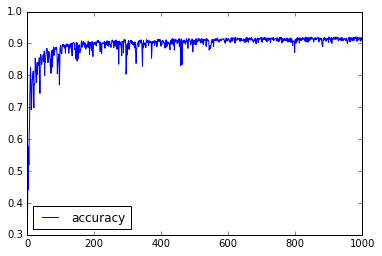

In [16]:
import matplotlib.pyplot as plt
import pandas as pds
%matplotlib inline

data_frame = pds.DataFrame({'accuracy': accuracies})
data_frame.plot()